In [1]:
!pip install sqlalchemy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
from sqlalchemy import create_engine
import pandas as pd

database_path = "sahayak.db"

engine = create_engine(f"sqlite:///{database_path}")

### View All the Tables

In [3]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, engine)
print(tables)

         name
0        user
1  fundraiser
2    donation


### Number of Fundraisers

In [5]:
query = "SELECT COUNT(*) as total_fundraisers FROM fundraiser;"
fundraisers = pd.read_sql(query, engine)
print(fundraisers)

   total_fundraisers
0                  3


### Total Donations Made

In [7]:
query = "SELECT SUM(amount) as total_donations FROM donation;"
total_donations = pd.read_sql(query, engine)
print(total_donations)

  total_donations
0            None


### Top Donors

In [9]:
query = """
SELECT user_id, SUM(amount) as total_donated 
FROM donation 
GROUP BY user_id 
ORDER BY total_donated DESC 
LIMIT 5;
"""
top_donors = pd.read_sql(query, engine)
print(top_donors)

Empty DataFrame
Columns: [user_id, total_donated]
Index: []


### Fundraisers by Category

In [24]:
query = "SELECT category, COUNT(*) as total FROM fundraiser GROUP BY category;"
categories = pd.read_sql(query, engine)
print(categories)

         category  total
0  Animal Welfare      1
1       Education      2


## *Visualizations*

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

### Donations by Fundraiser

C:\Users\liger\AppData\Local\Temp\ipykernel_23076\3059331471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_donated', y='title', data=data, palette="viridis")


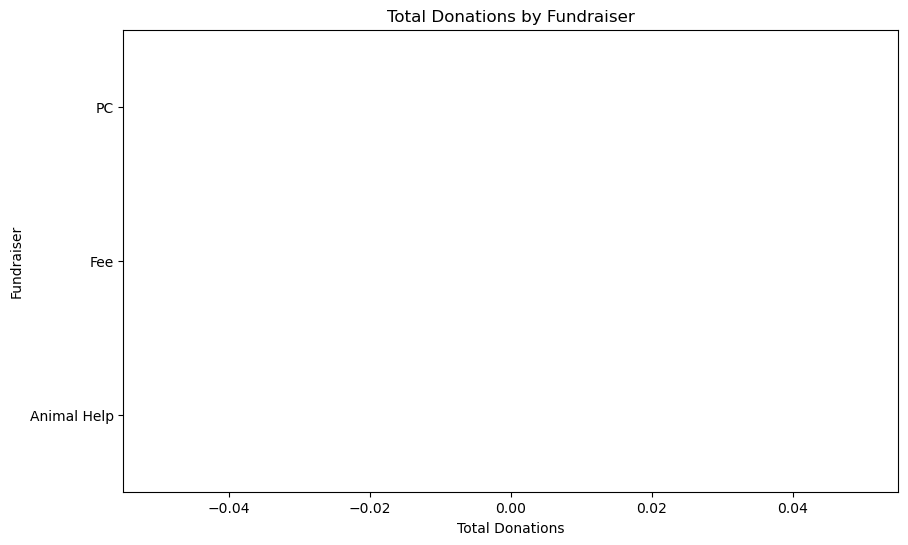

In [37]:
query = "SELECT title, total_donated FROM fundraiser;"
data = pd.read_sql(query, engine)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_donated', y='title', data=data, palette="viridis")
plt.title("Total Donations by Fundraiser")
plt.xlabel("Total Donations")
plt.ylabel("Fundraiser")
plt.show()

### Fundraisers by Categories

C:\Users\liger\AppData\Local\Temp\ipykernel_23076\1133744996.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total', y='category', data=data, palette="magma")


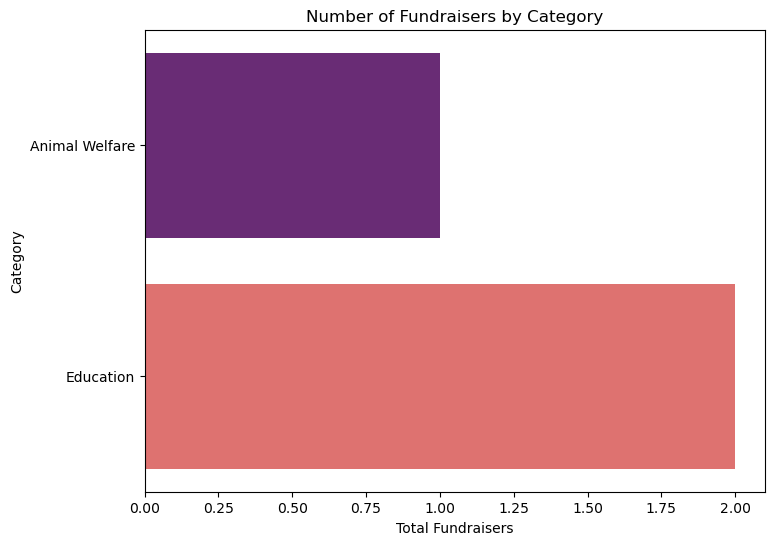

In [32]:
query = "SELECT category, COUNT(*) as total FROM fundraiser GROUP BY category;"
data = pd.read_sql(query, engine)

plt.figure(figsize=(8, 6))
sns.barplot(x='total', y='category', data=data, palette="magma")
plt.title("Number of Fundraisers by Category")
plt.xlabel("Total Fundraisers")
plt.ylabel("Category")
plt.show()

### Top Donors

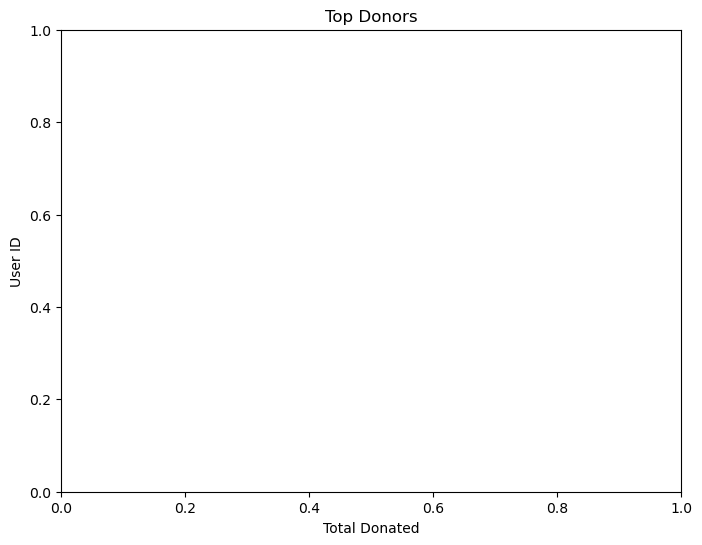

In [45]:
query = """
SELECT user_id, SUM(amount) as total_donated 
FROM donation 
GROUP BY user_id 
ORDER BY total_donated DESC 
LIMIT 5;
"""
data = pd.read_sql(query, engine)

plt.figure(figsize=(8, 6))
sns.barplot(x='total_donated', y='user_id', data=data, palette="coolwarm")
plt.title("Top Donors")
plt.xlabel("Total Donated")
plt.ylabel("User ID")
plt.show()

In [11]:
from sqlalchemy import inspect

# Inspect the donation table
inspector = inspect(engine)
columns = inspector.get_columns('donation')

# Display column details
for column in columns:
    print(f"Name: {column['name']}, Type: {column['type']}, Nullable: {column['nullable']}")

Name: id, Type: INTEGER, Nullable: False
Name: user_id, Type: INTEGER, Nullable: False
Name: amount, Type: FLOAT, Nullable: False
Name: fundraiser_id, Type: INTEGER, Nullable: False
Name: timestamp, Type: DATETIME, Nullable: True
